In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
'''for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))'''

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

"for dirname, _, filenames in os.walk('/kaggle/input'):\n    for filename in filenames:\n        print(os.path.join(dirname, filename))"

# Covid-19 x-ray image dataset analysis

In [2]:
import os
import cv2
import glob
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Activation, AvgPool2D, MaxPool2D, Flatten, Dense, Dropout
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, precision_score, recall_score, f1_score 

In [3]:
data = '../input/cxr-2-classes'
os.listdir(data)

['Normal', 'Covid-19']

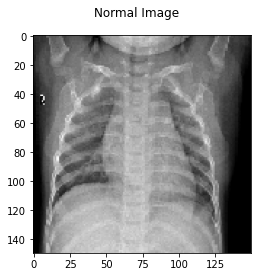

In [4]:
normal_images = []
count = 0

for img_path in glob.glob(data + "/Normal/*"):
    count += 1
    normal_images.append(image.load_img(str(img_path), target_size = (150,150,3)))

fig = plt.figure()
fig.suptitle('Normal Image')
plt.imshow(normal_images[0], cmap='gray')

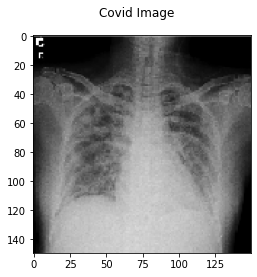

In [5]:
covid_images = []
count = 0

for img_path in glob.glob(data + "/Covid-19/*"):
    count += 1
    covid_images.append(image.load_img(str(img_path), target_size = (150,150,3)))
    
fig = plt.figure()
fig.suptitle('Covid Image')
plt.imshow(covid_images[0], cmap='gray')

In [6]:
from keras.preprocessing.image import ImageDataGenerator,load_img, img_to_array

train_datagen = ImageDataGenerator(rescale = 1./255, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True,
                                  validation_split = 0.25)

train_data = train_datagen.flow_from_directory(data, target_size=(150, 150), batch_size=6, class_mode='binary',shuffle= False, subset='training')
validation_data = train_datagen.flow_from_directory(data, target_size=(150, 150), batch_size=6, class_mode='binary',shuffle= False, subset='validation')

Found 1257 images belonging to 2 classes.
Found 418 images belonging to 2 classes.


In [7]:
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (3,3), activation = "relu", input_shape=(150,150,3), kernel_initializer='he_normal',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(Conv2D(250,(3,3)))
model.add(Activation("relu"))
  
model.add(Conv2D(128,(3,3)))
model.add(Activation("relu"))
model.add(AvgPool2D(2,2))
model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(AvgPool2D(2,2))

model.add(Flatten())
model.add(Dense(32))
model.add(Dropout(0.25))
model.add(Dense(1))
model.add(Activation("sigmoid"))
model.compile(loss = "binary_crossentropy", optimizer = "adam", metrics = ["accuracy",tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])

2023-01-12 22:07:10.747293: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-12 22:07:10.748363: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-12 22:07:10.981186: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-12 22:07:10.982175: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-12 22:07:10.983035: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from S

In [8]:
history= model.fit(train_data, steps_per_epoch = 10, epochs=20, validation_data = validation_data)

2023-01-12 22:07:14.846563: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/20


2023-01-12 22:07:17.835455: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


10/10 [==============================] - 16s 516ms/step - loss: 5.8086 - accuracy: 0.3167 - precision: 0.2800 - recall: 0.2333 - val_loss: 0.8277 - val_accuracy: 0.5072 - val_precision: 0.5072 - val_recall: 1.0000
Epoch 2/20
10/10 [==============================] - 4s 387ms/step - loss: 0.7891 - accuracy: 0.4912 - precision: 0.2000 - recall: 0.1500 - val_loss: 0.7570 - val_accuracy: 0.4928 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/20
10/10 [==============================] - 4s 385ms/step - loss: 0.5041 - accuracy: 0.7000 - precision: 1.0000 - recall: 0.5714 - val_loss: 21.3646 - val_accuracy: 0.5072 - val_precision: 0.5072 - val_recall: 1.0000
Epoch 4/20
10/10 [==============================] - 4s 473ms/step - loss: 30.5660 - accuracy: 0.6833 - precision: 0.6604 - recall: 0.9722 - val_loss: 0.7032 - val_accuracy: 0.4928 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 5/20
10/10 [==============================] - 4s 385ms/step - loss: 0.7241 - accuracy: 0.3

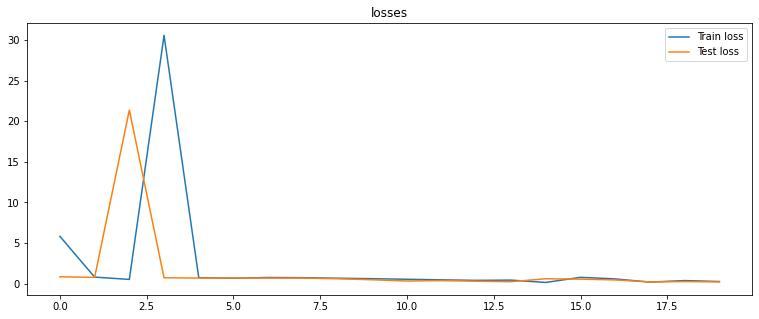

In [9]:
plt.subplots(figsize=(13,5))
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Test loss')
plt.title('losses')
a=plt.legend()

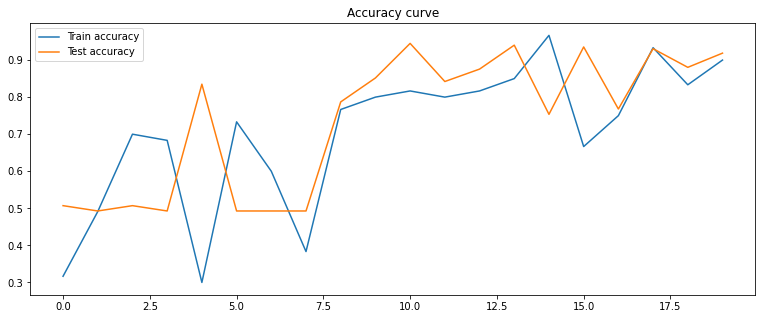

In [10]:
plt.subplots(figsize=(13,5))
plt.plot(history.history['accuracy'], label='Train accuracy')
plt.plot(history.history['val_accuracy'], label='Test accuracy')
plt.title('Accuracy curve')
a=plt.legend()

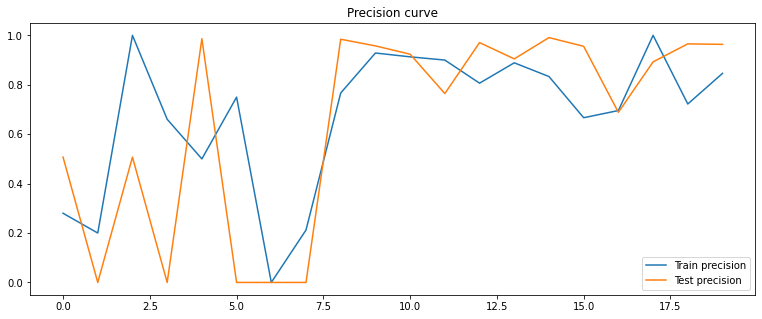

In [11]:
plt.subplots(figsize=(13,5))
plt.plot(history.history['precision'], label='Train precision')
plt.plot(history.history['val_precision'], label='Test precision')
plt.title('Precision curve')
a=plt.legend()

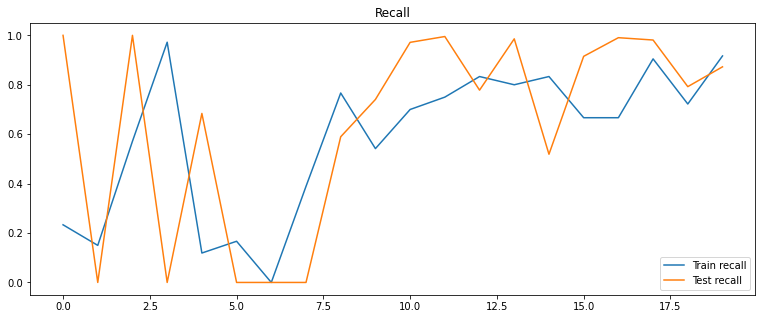

In [12]:
plt.subplots(figsize=(13,5))
plt.plot(history.history['recall'], label='Train recall')
plt.plot(history.history['val_recall'], label='Test recall')
plt.title('Recall')
a=plt.legend()

In [13]:
print("Training accuracy", history.history['accuracy'][-1])
print("Validation accuracy", history.history['val_accuracy'][-1])

Training accuracy 0.8999999761581421
Validation accuracy 0.9186602830886841


In [14]:
predictions = (model.predict(train_data)>0.5).astype("int32")
y_train2 = train_data.labels
print('Train Accuracy score: ', accuracy_score(y_train2, predictions))
print('Train Precision score: ', precision_score(y_train2, predictions))
print('Train Recall score: ', recall_score(y_train2, predictions))
print('Train F1-score: ', f1_score(y_train2, predictions))
print('Classification report:\n', classification_report(y_train2, predictions))

Train Accuracy score:  0.918854415274463
Train Precision score:  0.9496644295302014
Train Recall score:  0.8871473354231975
Train F1-score:  0.9173419773095624
Classification report:
               precision    recall  f1-score   support

           0       0.89      0.95      0.92       619
           1       0.95      0.89      0.92       638

    accuracy                           0.92      1257
   macro avg       0.92      0.92      0.92      1257
weighted avg       0.92      0.92      0.92      1257



In [15]:
predictions = (model.predict(validation_data)>0.5).astype("int32")
y_test2 = validation_data.labels
print('Test Accuracy score: ', accuracy_score(y_test2, predictions))
print('Test Precision score: ', precision_score(y_test2, predictions))
print('Test Recall score: ', recall_score(y_test2, predictions))
print('Test F1-score: ', f1_score(y_test2, predictions))
print('Classification report:\n', classification_report(y_test2, predictions))

Test Accuracy score:  0.8947368421052632
Test Precision score:  0.9516129032258065
Test Recall score:  0.8349056603773585
Test F1-score:  0.8894472361809045
Classification report:
               precision    recall  f1-score   support

           0       0.85      0.96      0.90       206
           1       0.95      0.83      0.89       212

    accuracy                           0.89       418
   macro avg       0.90      0.90      0.89       418
weighted avg       0.90      0.89      0.89       418

